# A Cyclic Graph


Let's introduce some complexity to our graph.
This time, the graph is cyclic, meaning that there are loops in the graph.


## The Collatz Conjecture

The Collatz conjecture is a famous unsolved problem in mathematics.
It is defined as follows:

- Start with any positive integer $n$.
- If $n$ is even, divide it by 2.
- If $n$ is odd, multiply it by 3 and add 1.
- Repeat the process until you reach 1.

The conjecture is that no matter what positive integer you start with, you will always reach 1 eventually!


In [34]:
from IPython.display import Image, display
from pprint import pprint
from typing import Any, TypedDict

from langgraph.graph import (
    StateGraph,
    START,
    END,
)  # For creating and running agentic workflows

## 1. Define the **State**

This time, our state will need to "remember" the number we are currently working with:


In [2]:
class State(TypedDict):
    n: int

## 2. Define the **Nodes**

This time we will have two nodes.

- The first node calculates the next number in the sequence.
- The second node determines if we have reached the end of the sequence.


In [33]:
def collatz(state: State) -> State:
    """
    This node calculates the next number in the Collatz sequence.
    """

    current_n = state.get("n")
    print(f"n: {current_n}")

    if current_n % 2 == 0:
        next_n = current_n // 2  # Integer division
    else:
        next_n = (current_n * 3) + 1

    return {"n": next_n}


def is_one(state: State) -> Any:
    """
    This node determines if we've reached the end of the Collatz sequence (n = 1).
    """

    current_n = state.get("n")

    if current_n == 1:
        return END
    else:
        return "collatz"

## 3. Build the **Graph**

Now this time, we'll tell the graph to loop back to the same node if the number is not 1:


In [30]:
# 1. Create a graph
builder = StateGraph(State)

# 2. Add our nodes
builder.add_node("collatz", collatz)

# 3. Add edges between nodes
builder.add_edge(START, "collatz")
builder.add_conditional_edges("collatz", is_one)

# 4. Compile the graph
graph = builder.compile()

`LangGraph` provides a nice method of visualizing the graph, which we can use to check our work:


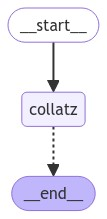

In [31]:
display(Image(graph.get_graph().draw_mermaid_png()))

## 4. Run the **Graph**

Now the exciting part! Let's execute our graph and see what happens:


In [37]:
initial_state = {"n": 4}

final_state = graph.invoke(initial_state)

n: 4
n: 2


In [28]:
pprint(final_state)

{'n': 1}
